<a href="https://colab.research.google.com/github/nurulashraf/linear-regression-spotify/blob/main/multiple_linear_regression_more_vars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/spotify_tracks.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [7]:
# Select relevant features for the analysis
music = df[['speechiness', 'energy', 'danceability', 'valence']]
music.head()

,speechiness,energy,danceability,valence
0,0.1030,0.970,0.753,0.459
1,0.0952,0.793,0.780,0.821
2,0.1530,0.491,0.457,0.598
3,0.4450,0.630,0.718,0.362
4,0.1580,0.748,0.689,0.593


In [8]:
# Define features (X) and target variable (y)
X = music.drop("valence", axis=1).values
y = music["valence"].values

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [19]:
# Test the model
music.head()

,speechiness,energy,danceability,valence
0,0.1030,0.970,0.753,0.459
1,0.0952,0.793,0.780,0.821
2,0.1530,0.491,0.457,0.598
3,0.4450,0.630,0.718,0.362
4,0.1580,0.748,0.689,0.593


In [24]:
# Test the model with a specific example
example = np.array([[0.1580, 0.748, 0.689]])  # Example input: [speechiness, energy, danceability]
predicted_valence = model.predict(example)[0]
print(f"Predicted Valence for input {example}: {predicted_valence}")

Predicted Valence for input [[0.158 0.748 0.689]]: 0.6116665458647808


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.03671173132591916
Root Mean Squared Error: 0.19160305667164904


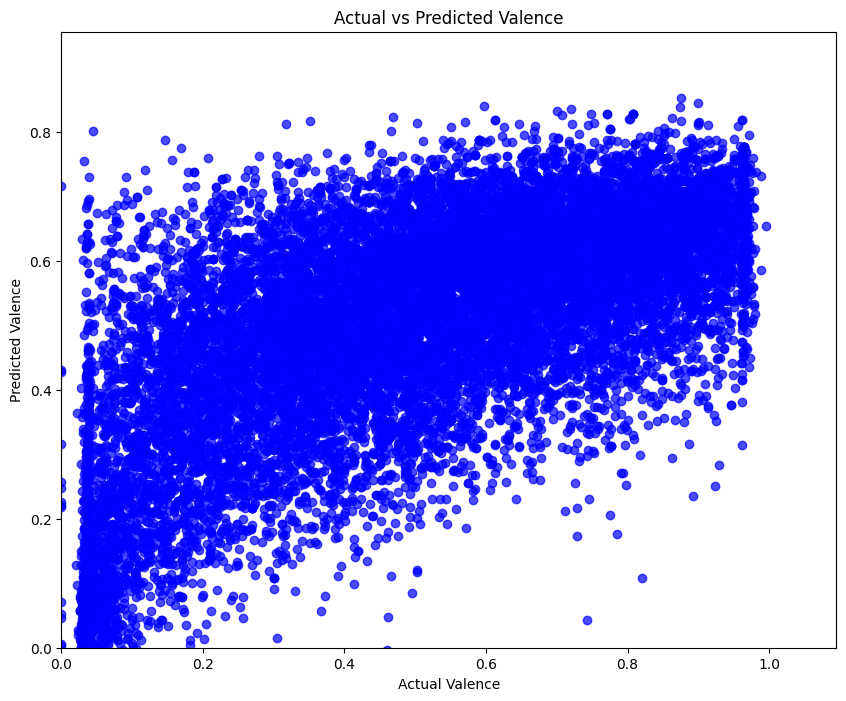

In [15]:
# Plot the Actual vs Predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.title("Actual vs Predicted Valence")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

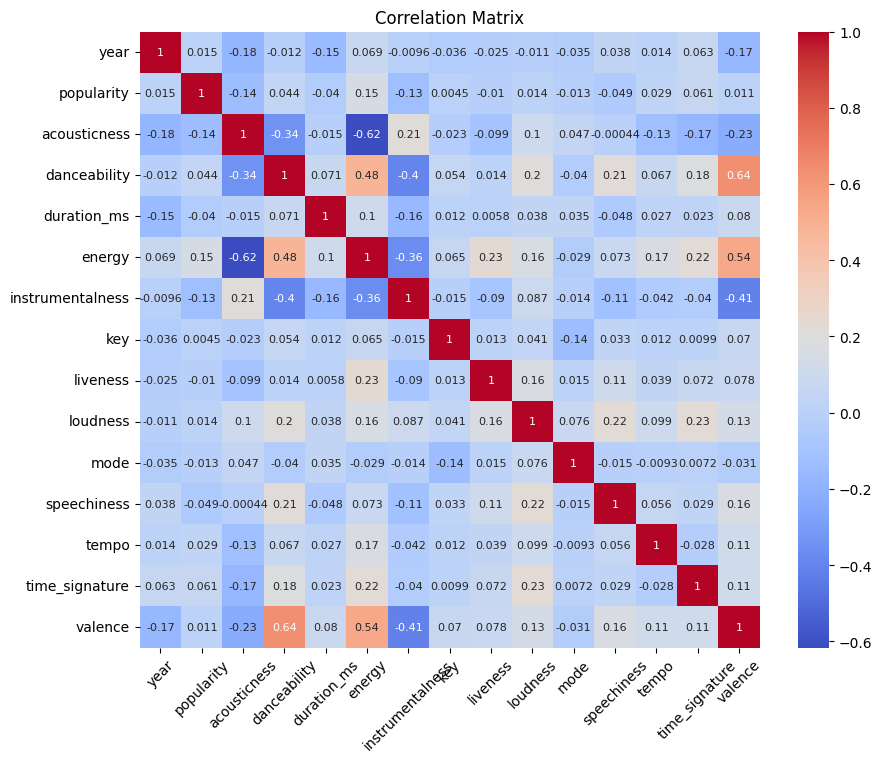

In [16]:
# Visualize the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"fontsize": 8})
plt.xticks(rotation=45)
plt.title("Correlation Matrix")
plt.show()

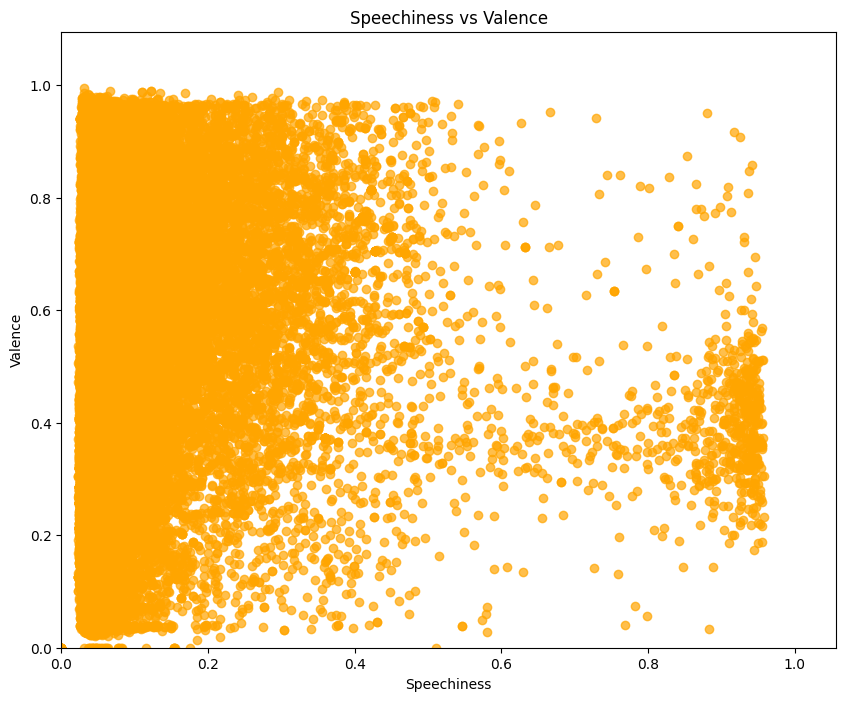

In [17]:
# Scatter plot of one feature vs target variable
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, alpha=0.7, color='orange')  # Scatter plot of 'speechiness' vs 'valence'
plt.xlabel("Speechiness")
plt.ylabel("Valence")
plt.title('Speechiness vs Valence')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()